In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


In [2]:
a = pd.read_csv("data/processed data/radar_data.csv")


In [3]:
a.head()

,"X, (m)","Y, (m)","Z, (m)",AbsoluteRadialVelocity,RadarCrossSection,RelativeRadialVelocity,RelativeLateralVelocity,Range,DistanceAccuracy,AngleAccuracy,...,HasQuality,QPDH0,QDistLongRMS,QDistLatRMS,QVLongRMS,QVLatRMS,QAmbigState,QInvalidState,"(radar_point_ts - lidar_ts), (s)",radar_idx
0,-23.668182,3.218049,0.0,0.038242,-12.0,6.991968,0.00,0.0,0.1,0.005351,...,1.0,0.75,1.023,0.616,0.288,0.011,1.0,4.0,-1.94358,1.0
1,-26.694651,7.312004,0.0,-5.572917,-11.0,1.234427,0.00,0.0,0.1,0.005474,...,1.0,0.75,2.187,0.616,0.288,0.011,1.0,4.0,-1.94358,1.0
2,-35.357533,6.183960,0.0,-5.938611,-0.5,0.999823,-1.75,0.0,0.1,0.005288,...,1.0,0.25,1.317,0.794,0.288,0.011,3.0,0.0,-1.94358,1.0
3,-38.363762,5.016790,0.0,-6.703544,-2.5,0.249825,-1.75,0.0,0.1,0.005331,...,1.0,0.75,1.317,0.616,0.288,0.011,3.0,4.0,-1.94358,1.0
4,-33.727116,21.107092,0.0,0.210629,10.0,6.081826,0.00,0.0,0.1,0.005579,...,1.0,0.25,0.616,0.616,0.371,0.011,3.0,0.0,-1.94358,1.0


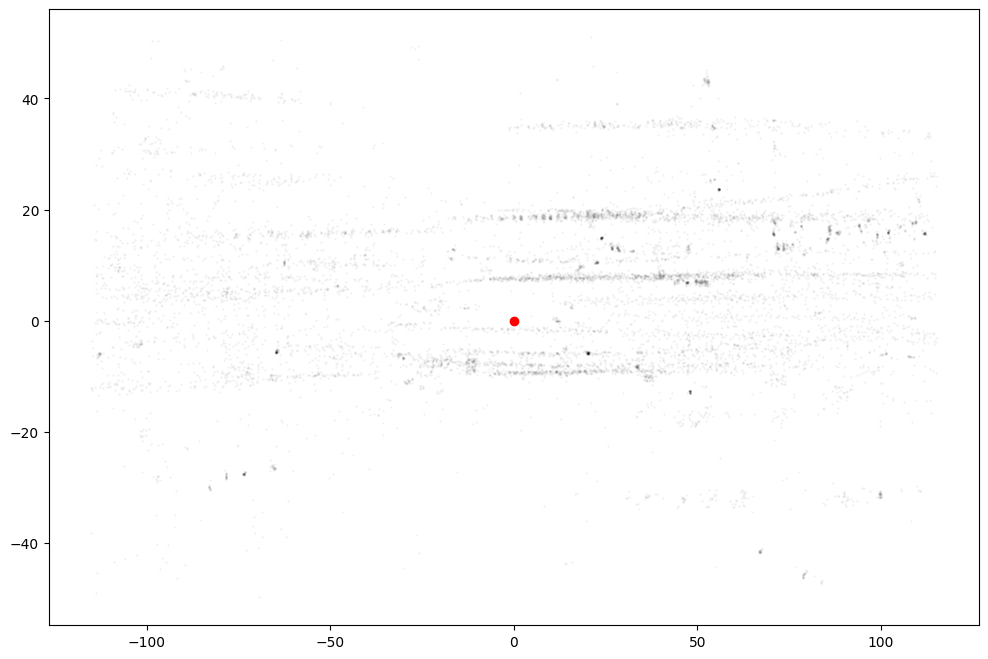

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(a["X, (m)"][10000:20000], a["Y, (m)"][10000:20000], s=1, alpha=0.03, c="black")
plt.scatter(0, 0, c="red")

In [12]:
radar_df = pd.read_csv("data/processed data/lidar_data.csv")

0.005229920374462299

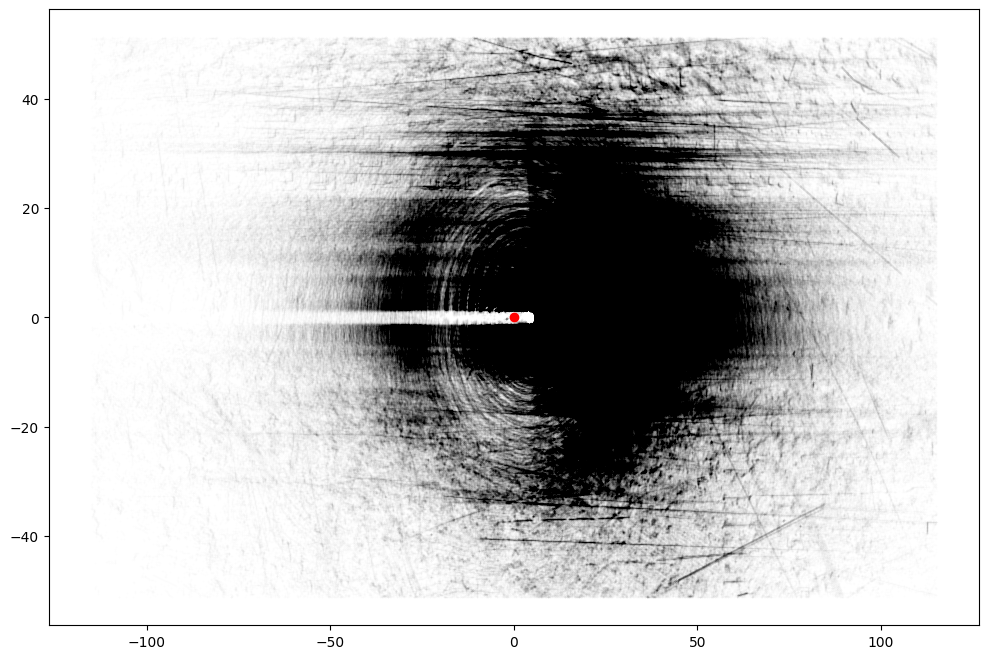

In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(radar_df["X, (m)"], radar_df["Y, (m)"], s=1, alpha=0.002, c="black")
plt.scatter(0, 0, c="red")

19120750


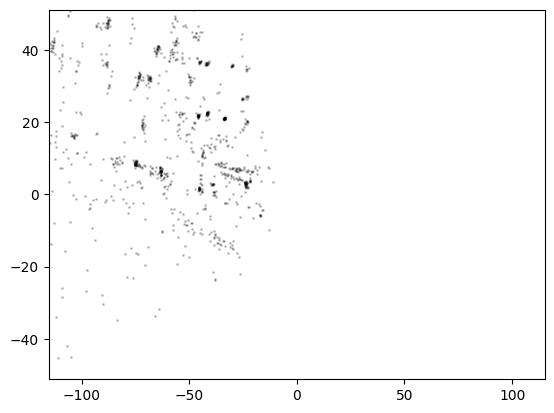

In [52]:
import matplotlib.animation as animation
print(len(radar_df["X, (m)"]))
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=1, alpha=0.2, c="black")


ax.set_xlim(a["X, (m)"].min(), a["X, (m)"].max())
ax.set_ylim(a["Y, (m)"].min(), a["Y, (m)"].max())

def animate(i):
    start_index = i * 1000
    end_index = (i + 1) * 1000
    if end_index > len(a):  # Проверка на выход за пределы данных
        end_index = len(a)
    
    
    scat.set_offsets(a[["X, (m)", "Y, (m)"]].iloc[start_index:end_index].values)
    
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat=True, frames=200, interval=50)

writer = animation.PillowWriter(fps=15, metadata=dict(artist="Me"), bitrate=1800)
ani.save("data/scatter.gif", writer=writer)